In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("nyc-subway-weather.csv")
df.head(4)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [3]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    correlation = average of (x in standard units) times (y in standard units)
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    normalize_x = (x - x.mean()) / x.std(ddof=0) #cancel the  Bessel's correction by using ddof = 0
    normalize_y = (y - y.mean()) / y.std(ddof=0)
    return normalize_x * normalize_y

#use the numpy function directly
np.corrcoef(df["ENTRIESn_hourly"], df["meanprecipi"])

array([[ 1.        ,  0.03564852],
       [ 0.03564852,  1.        ]])

In [4]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift(1)

using the pandas function method shift, <code>DataFrame.shift(periods=1, freq=None, axis=0)</code>. Ahout the argument axis, 0 is short for index, 1 is short for columns

In [5]:
def rank_level(data):
    if data >= 90:
        return "A"
    elif data >= 80:
        return "B"
    elif data >= 70:
        return "C"
    elif data >= 60:
        return "D"
    else:
        return "F"

def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return grades.applymap(rank_level)

<code>DataFrame.applymap(func)</code><br>
Apply a function to a DataFrame that is intended to operate elementwise, i.e. like doing map(func, series) for each series in the DataFrame.
<code>DataFrame.apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds)</code><br>
Applies function along input axis of DataFrame.
Objects passed to functions are Series objects having index either the DataFrame’s index (axis=0) or the columns (axis=1). Return type depends on whether passed function aggregates, or the reduce argument if the DataFrame is empty.
一句话归纳：apply可以单独的针对行或者列来计算，而applymap是针对所有元素一起处理

In [6]:
def convert_grades_curve(exam_grades):
    # Pandas has a bult-in function that will perform this calculation
    # This will give the bottom 0% to 10% of students the grade 'F',
    # 10% to 20% the grade 'D', and so on. You can read more about
    # the qcut() function here:
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    return pd.qcut(exam_grades,
                   [0, 0.1, 0.2, 0.5, 0.8, 1],
                   labels=['F', 'D', 'C', 'B', 'A'])
df2 = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

df2.apply(convert_grades_curve) #注意apply函数不是原位置返回，类似生成了一个view对象

,exam1,exam2
Andre,F,F
Barry,B,B
Chris,C,C
Dan,C,C
Emilio,B,B
Fred,C,C
Greta,A,A
Humbert,D,D
Ivan,A,A
James,B,B


In [7]:
df3 = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

def second(data):
    max_num = data.max()
    second_num = 0
    for i in range(len(data)):
        if data[i] > second_num and data[i] < data.max():
            second_num = data[i]
    return second_num

def second1(data):
    sorted_column = data.sort_values(ascending=False)
    return sorted_column.iloc[1]

def second_largest(df, func):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(func)

print(second_largest(df3, second))
print(second_largest(df3, second1))

a     4
b    40
c    20
dtype: int64
a     4
b    40
c    20
dtype: int64


In [8]:
s = pd.Series([1, 2, 3, 4])
df4 = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})
#上面两个相加表现为向量化的相加，因为s的值在df4中进行行加
df4+s

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


In [9]:
s = pd.Series([1, 2, 3, 4])
df5 = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
#上面两个相加也是向量化相加，表现为s和df5直接元素相加
df5 + s

,0,1,2,3
0,11,22,33,44


In [10]:
s = pd.Series([1, 2, 3, 4])
df6 = pd.DataFrame({0: [10, 20, 30, 40]})
#上面两个相加，是行和列的向量化相加，注意把s作为行来看待
df6 + s

,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


In [11]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([1, 2, 3, 4])
df6 = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})
#上面两个相加，s是行形式，并且赋予了index，所以相加时候的对index匹配相加，如果s没有index赋值，那么默认是位置赋值起始是0
print("s1具有和df6相同的index相加:\n")
print(s1+df6)
print("s2具有和df6不相同的index相加:\n")
print(s2+df6)

s1具有和df6相同的index相加:

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164
s2具有和df6不相同的index相加:

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [12]:
s = pd.Series([1, 2, 3, 4])
df7 = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})
#pandas具有add、div、sub、mul等方法，它可以按照指定对方式进行运算，例如Series和dataframe在行和列上运算，需要制定axis
print("指定axis为0按照index运算，就是在列上运算")
print(df7.add(s, axis=0))
print("指定axis为1按照column运算，就是在行上运算")
print(df7.add(s, axis=1))

指定axis为0按照index运算，就是在列上运算
    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164
指定axis为1按照column运算，就是在行上运算
    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [13]:
df8= pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return (df - df.mean()) / df.std(ddof=0)

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    return df.sub(df.mean(axis="columns"), axis="index").div(df.std(axis="columns"), axis="index")

mean_df8 = df8.sub(df8.mean(axis="columns"), axis="index")
mean_df8.div(df8.std(axis="columns"), axis="index")
standardize_rows(df8)

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


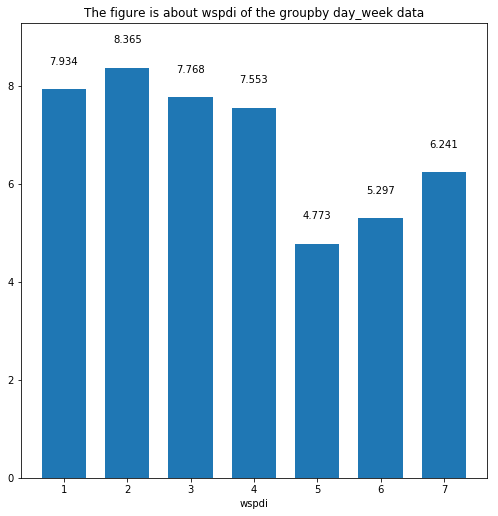

day_week
0    7.934180
1    8.365128
2    7.767858
3    7.552944
4    4.773413
5    5.297283
6    6.241380
Name: wspdi, dtype: float64

In [14]:
### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.
import matplotlib.pyplot as plt
%matplotlib inline
def groupData(data, group_by=None, describe_by=None):
    result = data.groupby(group_by).mean()[describe_by]
    x = result.index + 1
    y = result.values
    plt.figure(figsize=(max(list(x)+list(y)), max(list(x)+list(y))))
    plt.bar(x,y, width=0.7, align="center")
    for loc_x, loc_y in zip(x,y):
        plt.text(loc_x, loc_y+0.5, "%.3f" % loc_y, ha="center")
    plt.title("The figure is about %s of the groupby %s data" % (describe_by, group_by))
    plt.xlabel(describe_by)
    plt.ylim(0, max(y)+np.std(y)*0.7)
    plt.show()
    return result

groupData(df, group_by="day_week", describe_by="wspdi")

In [15]:
def hourly_for_group(data):
    return data - data.shift(1)
df.groupby("UNIT")[["ENTRIESn", "EXITSn"]].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,15.0,34.0
6,1430341.0,963731.0
7,-1429834.0,-963573.0
8,490.0,132.0
9,231.0,232.0


In [16]:
df.columns

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')

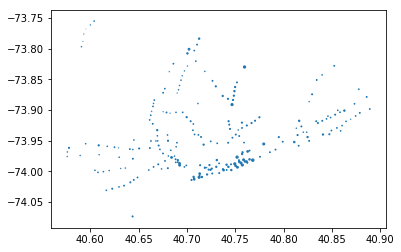

In [17]:
groupLonLat = df.groupby(["latitude", "longitude"], as_index=False).mean()
scaleSize = groupLonLat["ENTRIESn_hourly"]/groupLonLat["ENTRIESn_hourly"].std()
plt.scatter(groupLonLat["latitude"], groupLonLat["longitude"], s=scaleSize)
#注意因为groupby的时候，调用等参数会被直接作为index的值，而不在作为column，所以需要添加as_index的参数来修正

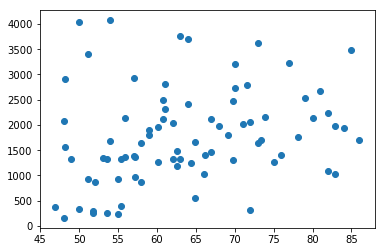

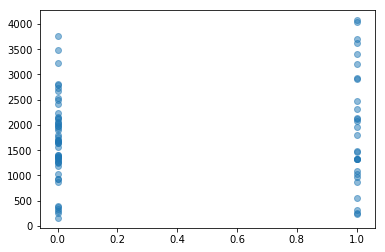

In [18]:
groupTemRain = df.groupby(["rain", "tempi"], as_index=False).mean()
# scaleSize = groupTemRain["ENTRIESn_hourly"]/groupTemRain["ENTRIESn_hourly"].std()
plt.scatter(groupTemRain["tempi"], groupTemRain["ENTRIESn_hourly"])
plt.show()
plt.scatter(groupTemRain["rain"], groupTemRain["ENTRIESn_hourly"], alpha=0.5)
plt.show()